# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
#pretty print for checking json
from pprint import pprint

#stats for line regression
from scipy import stats

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

**PseudoCode**
1. set the url using the api key linked to the weather account--got from the api call section of the api doc
"https://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key



2. create endpoint url with each city
url + "&q=" + city

run json to check work so far and get the info for below
response = requests.get(city_url)
response.json()


3. retrieve city data skelaton from json
4. parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 4 of Set 1 | kimbo
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | suva
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | amga
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | murghob
Processing Record 15 of Set 1 | rio grande
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | hakha
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | tolanaro
Processing Record 21 of Set 1 | ambon
Processing Record 22 of Set 1 | preobrazheniye
Processing Record 23 

Processing Record 37 of Set 4 | kharp
Processing Record 38 of Set 4 | bargara
City not found. Skipping...
Processing Record 39 of Set 4 | bazarak
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | yashkino
Processing Record 42 of Set 4 | conception bay south
Processing Record 43 of Set 4 | acapulco de juarez
Processing Record 44 of Set 4 | anadyr
Processing Record 45 of Set 4 | samus'
Processing Record 46 of Set 4 | canico
Processing Record 47 of Set 4 | bolanos de calatrava
Processing Record 48 of Set 4 | newman
Processing Record 49 of Set 4 | lesnoy
Processing Record 0 of Set 5 | danielskuil
Processing Record 1 of Set 5 | la ligua
Processing Record 2 of Set 5 | zinjibar
Processing Record 3 of Set 5 | blackwell
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | port mathurin
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | cole harbour
Processing Record 8 of Set 5 | nova sintra
Processing Record 9 of Set 5 | kirensk
Pr

Processing Record 28 of Set 8 | januaria
Processing Record 29 of Set 8 | sorong
Processing Record 30 of Set 8 | palmer
Processing Record 31 of Set 8 | la ronge
Processing Record 32 of Set 8 | nanyang
Processing Record 33 of Set 8 | timmins
Processing Record 34 of Set 8 | flin flon
Processing Record 35 of Set 8 | saldanha
Processing Record 36 of Set 8 | saltillo
Processing Record 37 of Set 8 | tangalle
Processing Record 38 of Set 8 | island harbour
Processing Record 39 of Set 8 | manaure
Processing Record 40 of Set 8 | luebo
Processing Record 41 of Set 8 | glendive
Processing Record 42 of Set 8 | mul
Processing Record 43 of Set 8 | nar'yan-mar
Processing Record 44 of Set 8 | sallisaw
Processing Record 45 of Set 8 | gornyye klyuchi
Processing Record 46 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 47 of Set 8 | qamdo
Processing Record 48 of Set 8 | postmasburg
City not found. Skipping...
Processing Record 49 of Set 8 | gargalianoi
Processing Record 0 of Set 9 | k

Processing Record 18 of Set 12 | sungai raya
Processing Record 19 of Set 12 | kievka
Processing Record 20 of Set 12 | moissala
Processing Record 21 of Set 12 | baskil
Processing Record 22 of Set 12 | cochrane
Processing Record 23 of Set 12 | richards bay
Processing Record 24 of Set 12 | mulayjah
Processing Record 25 of Set 12 | saint-louis
Processing Record 26 of Set 12 | ondjiva
Processing Record 27 of Set 12 | puerto lempira
Processing Record 28 of Set 12 | torrington
Processing Record 29 of Set 12 | majene
Processing Record 30 of Set 12 | alamogordo
Processing Record 31 of Set 12 | beidao
Processing Record 32 of Set 12 | vung tau
Processing Record 33 of Set 12 | worcester
Processing Record 34 of Set 12 | shache
Processing Record 35 of Set 12 | am djarass
City not found. Skipping...
Processing Record 36 of Set 12 | remire-montjoly
Processing Record 37 of Set 12 | mabaruma
Processing Record 38 of Set 12 | mountain home
Processing Record 39 of Set 12 | colares
Processing Record 40 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.54,77,98,5.92,PN,1683429065
1,shunyi,40.1250,116.6453,23.97,19,0,4.00,CN,1683429065
2,anadyr,64.7500,177.4833,0.28,69,0,7.00,RU,1683429066
3,ushtobe,45.2514,77.9838,14.90,20,4,4.40,KZ,1683429066
4,college,64.8569,-147.8028,10.97,43,20,6.69,US,1683429066


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.54,77,98,5.92,PN,1683429065
1,shunyi,40.1250,116.6453,23.97,19,0,4.00,CN,1683429065
2,anadyr,64.7500,177.4833,0.28,69,0,7.00,RU,1683429066
3,ushtobe,45.2514,77.9838,14.90,20,4,4.40,KZ,1683429066
4,college,64.8569,-147.8028,10.97,43,20,6.69,US,1683429066


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

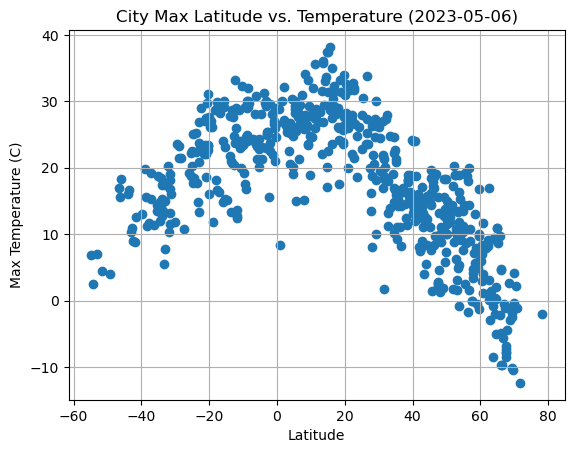

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-05-06)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

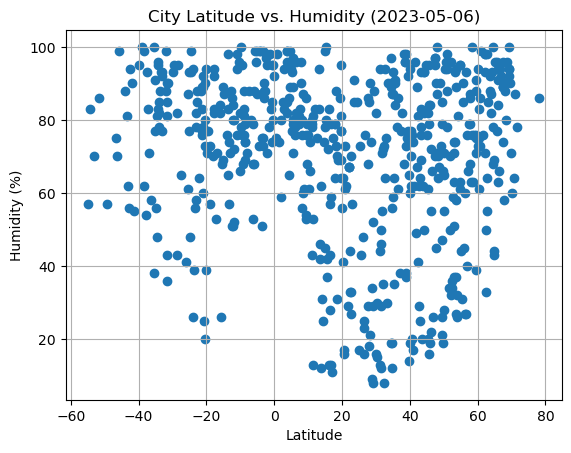

In [10]:
# Build the scatter plots for latitude vs. humidity: Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-05-06)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

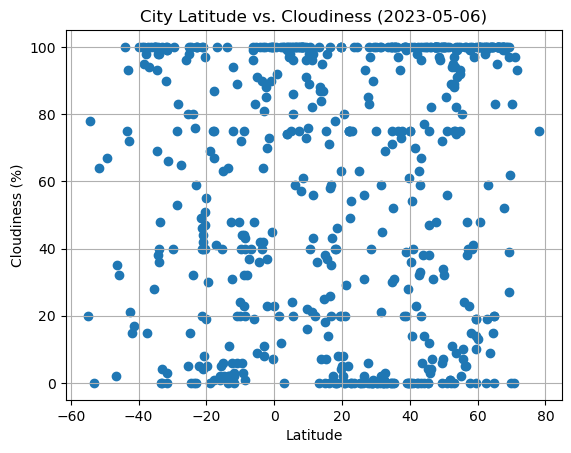

In [11]:
# Build the scatter plots for latitude vs. cloudiness:Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-05-06)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

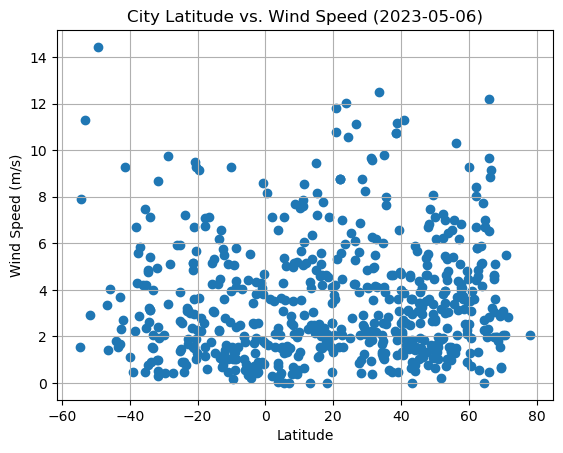

In [12]:
# Build the scatter plots for latitude vs. wind speed: Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-05-06)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


**PseudoCode**
northern hemisphere would be latitude range >=0
southern would be latitude range < 0
create each scatter plot
add in regression line (use the function to input the regression line in?? confused about the function aspect)

In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_val, y_val, title):
    #regression line
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

    # Get regression values
    regress_values = x_val * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Print r value
    print(f"The r-value is: {rvalue**2}")

    #_______________________________________________

    # Build scatter plot for latitude vs. temperature
    plt.scatter(x_val, y_val, marker="o")
    plt.plot(x_val, regress_values, color ="red")

    # Incorporate the other graph properties
    plt.title(f"Latitude vs. {title}")
    plt.ylabel(title)
    plt.xlabel("Latitude")
    plt.grid(True)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")
    
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.query('Lat >= 0')

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,shunyi,40.1250,116.6453,23.97,19,0,4.00,CN,1683429065
2,anadyr,64.7500,177.4833,0.28,69,0,7.00,RU,1683429066
3,ushtobe,45.2514,77.9838,14.90,20,4,4.40,KZ,1683429066
4,college,64.8569,-147.8028,10.97,43,20,6.69,US,1683429066
5,saipan,15.1355,145.7010,31.39,100,75,7.20,MP,1683429067


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.query('Lat < 0')

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.54,77,98,5.92,PN,1683429065
7,waitangi,-43.9535,-176.5597,16.01,88,100,1.79,NZ,1683429068
9,port alfred,-33.5906,26.8910,13.43,88,48,0.89,ZA,1683429068
10,saint-joseph,-21.3667,55.6167,22.21,76,20,5.17,RE,1683429068
11,lebu,-37.6167,-73.6500,11.51,93,15,5.59,CL,1683429068


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7136295286304143


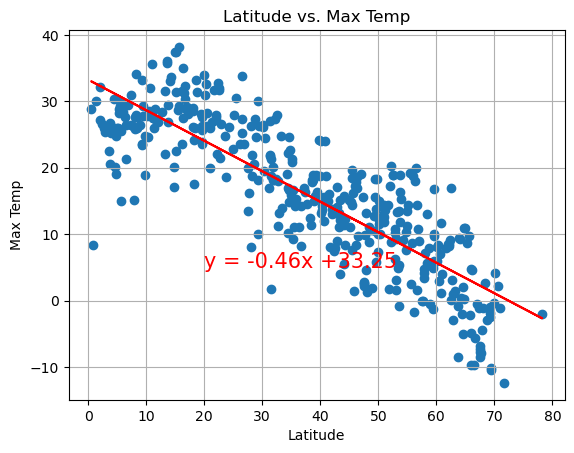

In [16]:
x_val = northern_hemi_df["Lat"] 
y_val = northern_hemi_df["Max Temp"]
plot_linear_regression(x_val, y_val, "Max Temp")

The r-value is: 0.4963578105035453


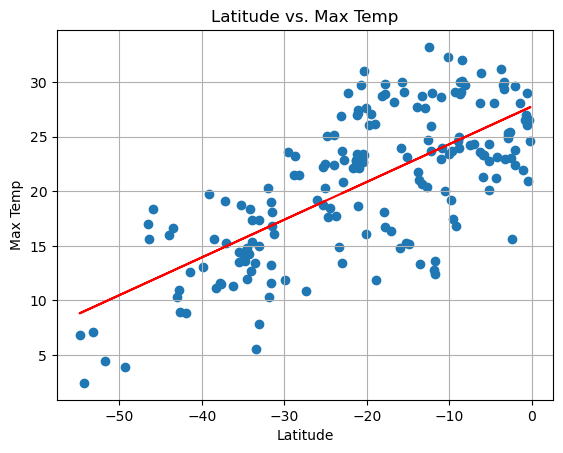

In [17]:
x_val = southern_hemi_df["Lat"] 
y_val = southern_hemi_df["Max Temp"]
plot_linear_regression(x_val, y_val, "Max Temp")

**Discussion about the linear relationship:** As the latitude gets further from the equator, the max temp decreases in the Northern Hemisphere. As the latitude gets closer to the equator, the max temp increases in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0072858578029995555


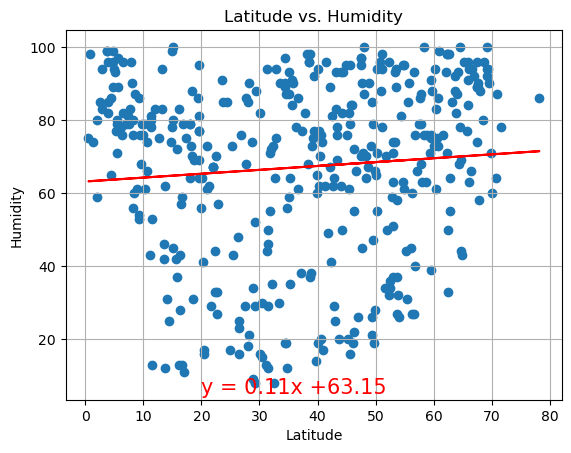

In [18]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. humidity: Humidity
x_val = northern_hemi_df["Lat"] 
y_val = northern_hemi_df["Humidity"]
plot_linear_regression(x_val, y_val, "Humidity")

The r-value is: 0.015127481827337128


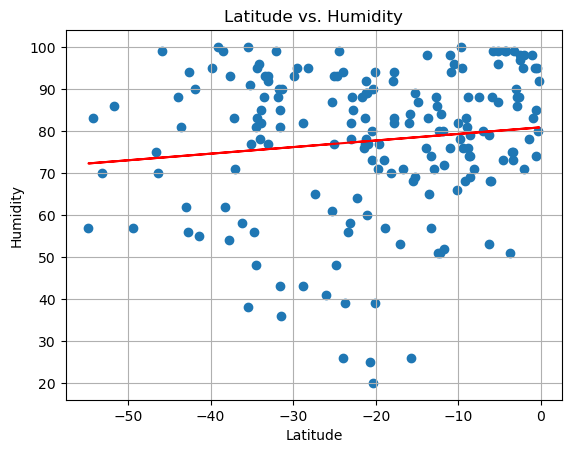

In [19]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. humidity: Humidity
x_val = southern_hemi_df["Lat"] 
y_val = southern_hemi_df["Humidity"]
plot_linear_regression(x_val, y_val, "Humidity")

**Discussion about the linear relationship:** As the latitude gets further from the equator, the humidity is expected to slightly increase in the Northern Hemisphere. As the latitude gets closer to the equator, the humidity is expected to slightly increase in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.004957998641987791


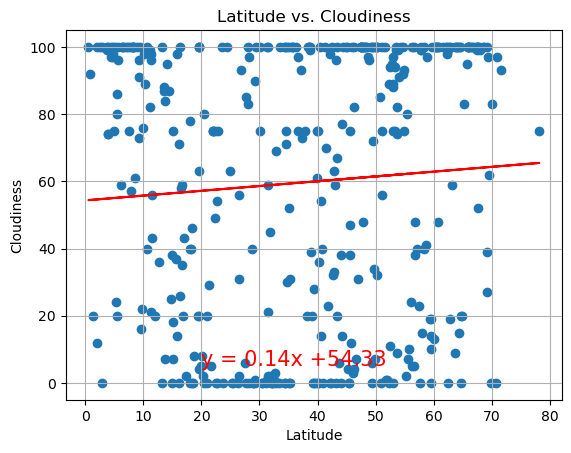

In [20]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. cloudiness:Cloudiness
x_val = northern_hemi_df["Lat"] 
y_val = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_val, y_val, "Cloudiness")

The r-value is: 0.011633910197172982


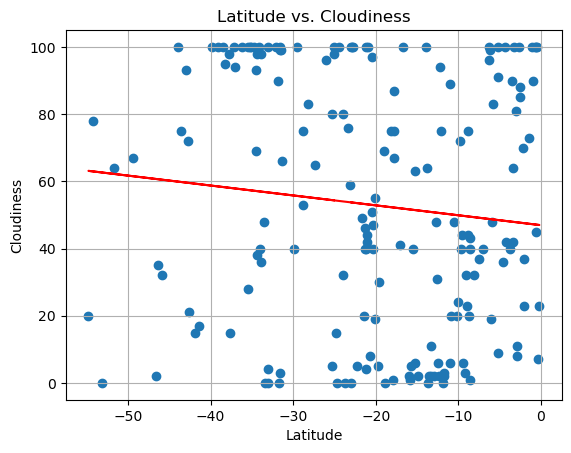

In [21]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. cloudiness:Cloudiness
x_val = southern_hemi_df["Lat"] 
y_val = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_val, y_val, "Cloudiness")

**Discussion about the linear relationship:** As the latitude gets further from the equator, the cloudiness is expected to slightly increase in the Northern Hemisphere. As the latitude gets closer to the equator, the cloudiness is expected to slightly decrease in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.001266066087404595


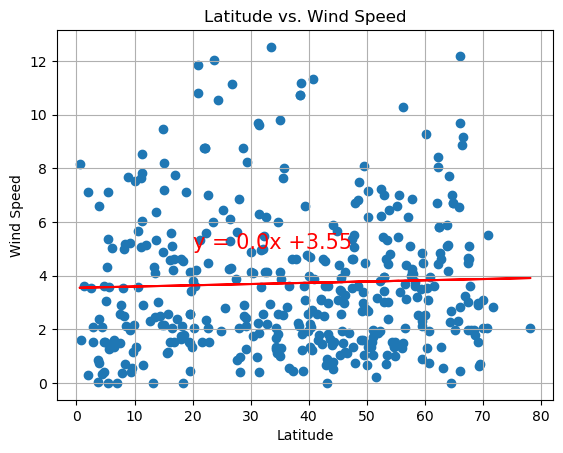

In [22]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed: Wind Speed
x_val = northern_hemi_df["Lat"] 
y_val = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_val, y_val, "Wind Speed")

The r-value is: 0.05028231290612883


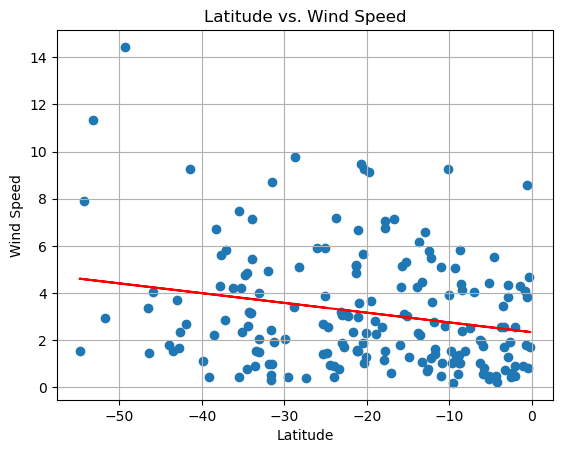

In [23]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed: Wind Speed
x_val = southern_hemi_df["Lat"] 
y_val = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_val, y_val, "Wind Speed")

**Discussion about the linear relationship:** As the latitude gets further from the equator, the wind speed is expected to remain consistent in the Northern Hemisphere. As the latitude gets closer to the equator, the wind speed is expected to slightly decrease in the Southern Hemisphere.